# 심층 신경망

* ANN에 층을 더해서 심층 신경망으로 만들어 봅시다. 
* 심층 신경망(DNN)은 은닉층이 2개 이상인 신경망을 말합니다. 


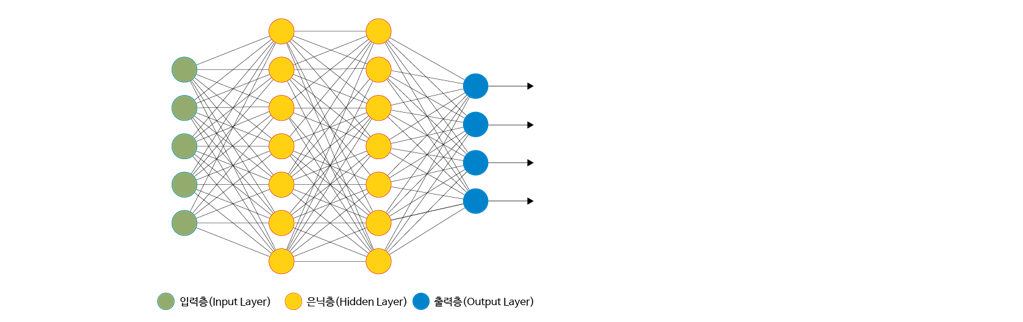

## 2개의 층

In [2]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split

#데이터 전처리
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열인 각 샘플을 1차원으로 펼침

#20% 검증데이터로 지정
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)


## 은닉층 추가

* 입력층과 출력층 사이에 추가된 밀집층을 **은닉층** 이라고 합니다. 
* 출력층과 마찬가지로,은닉층에서 계산된 선형방정식의 결과에 대해 활성화 함수를 적용합니다. 
* 출력층의 활성화 함수는 종류가 제한적이지만(시그모이드, 소프트맥스)
* 은닉층의 활성화 함수는 비교적 자유롭게 선택할 수 있습니다. 
 

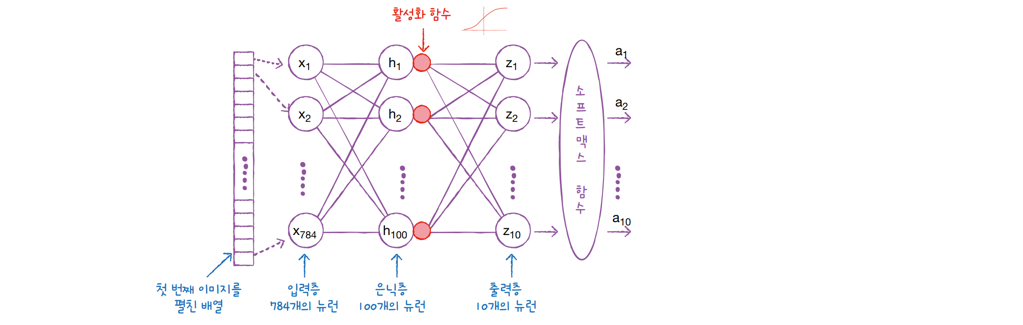

**[참고]**

**은닉층에 왜 활성화 함수를 적용할까요?**

* 단순히 선형적인 산술 계산만 수행한다면,
* 은닉층 1의 b와 은닉층 2의 b가 합쳐져 층의 역할이 소실됩니다. 
* 각 층에서 나온 선형계산을 비선형적으로 적당히 비틀어 주어야 
* 다음층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있습니다. 


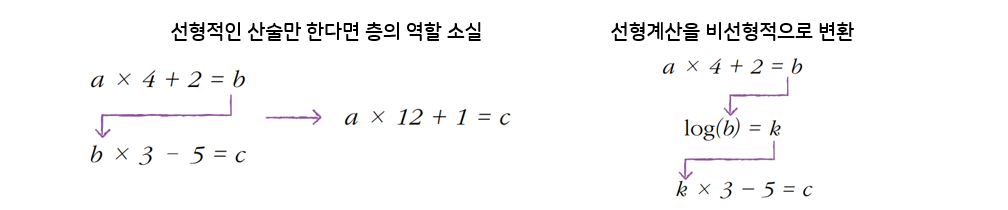

* 선형으로는 대부분 분리 불가능한 문제가 많습니다. 
* 이를 해결하기 위해서 여러 개의 퍼셉트론을 여러층으로 연결하여 복잡한 영역을 곡면으로 둘러싸는 결정 영역을 구하는 것입니다. 
* 활성화 함수를 비선형으로 하고 층의 개수가 증가함에 따라 나눌 수 있는 영역이 복잡해 질 때 층의 구조에 따른 결정 경계의 차이를 보여줍니다. 

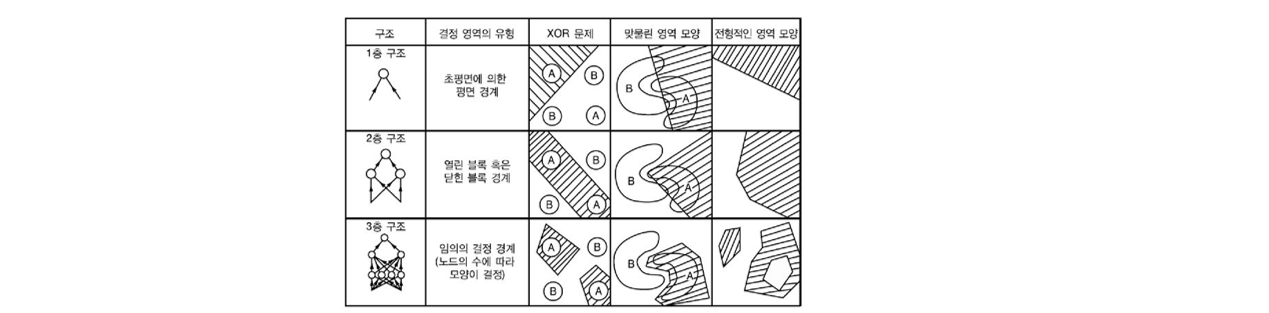

## 심층 신경망 만들기

In [4]:
## 심층신경망
model = Sequential()

In [6]:
#은닉층이고 100개의 뉴런을 가진 밀집층, 활성화 함수를 relu 지정 , 입력크기 784
#은닉층의 개수를 정하는데는 특별한 기준은 없고 경험치를 살려 지정하는 것임
#단, 출력층 개수 보다는 많게 지정

model.add(Dense(100,activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))



In [7]:
# 10개의 클래스를 분류하기 때문에 10개의 뉴런을 두고, 활성화 함수는 소프트 맥스
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 89,720
Trainable params: 89,720
Non-trainable params: 0
_________________________________________________________________


*  Output Shape(None, 100)에서 첫 번째 차원은 None이다. 샘플 개수가 아직 정해져 있지 않기 때문이다. 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None 설정

* 첫번째 차원은 배치 자원이라고 한다. 

* 784입력 X 100개 뉴런 + 100개 절편 = 78500 파라미터수

* Non-trainable params  경사하강법으로 훈련되지 않는 파라미터를 가진 층

* 784개의 특성이 은닉층을 통과하며 100개의 특성으로 압축되어짐

## 신경망 설정/훈련

In [9]:

from sklearn import metrics


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epoch_hist= model.fit(train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6786 - accuracy: 0.3083
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2901 - accuracy: 0.4083
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1519 - accuracy: 0.4636
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0813 - accuracy: 0.5049
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0086 - accuracy: 0.5778


## 활성화 함수: 렐루(Relu)

* 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고,
* 음수일 경우에는 0으로 만드는 함수
* max(0,z): z가 0보다 크면 z를 출력하고 z가 0보다 작으면 0을 출력합니다. 
* 이미지 처리에 좋은 성능을 낸다. 


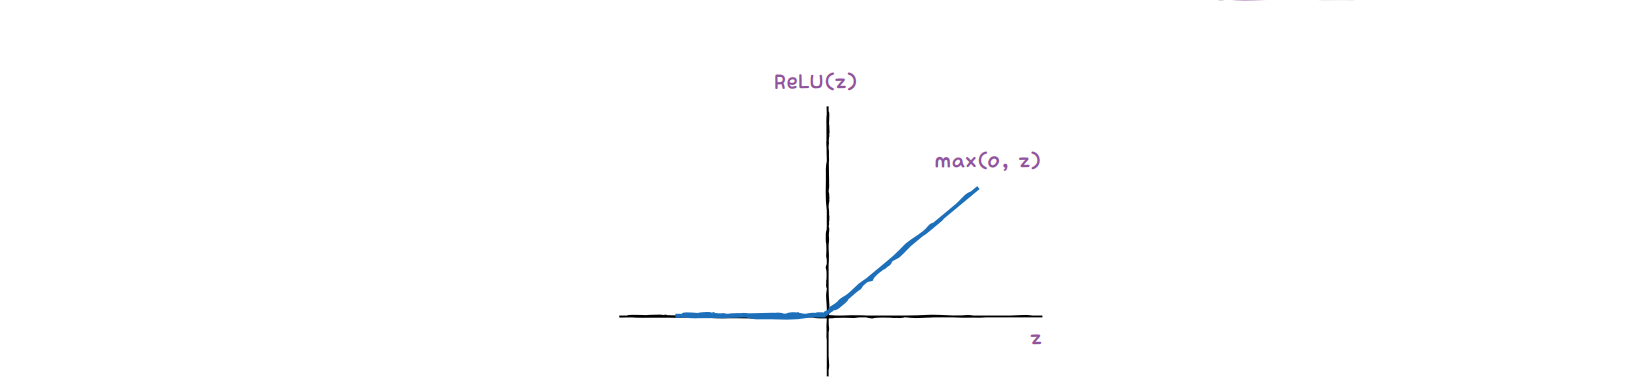

## Flatten클래스

* 인공신경망에 데이터를 주입하기 위해서는 1차원으로 펼쳐서 넣었다. reshape()
* 케라스에서 Flatten층을 제공한다. 
* 인공신경망의 성능을 위해 기여하는 바는 없다. 
* 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라고 한다. 

In [10]:
#훈련, 검증 데이터 세트
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#데이터 전처리
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화

#20% 검증데이터로 지정
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)


In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #플래튼 층 reshape() 대신 사용하면 편리 -> 층으로 카운트 하진 않음
model.add(Dense(100, activation='relu')) #렐루함수
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

epoch_hist = model.fit(train_scaled, y_train, epochs=5) #전체 데이터 5번 반복훈련

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5254 - accuracy: 0.8130
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3913 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3540 - accuracy: 0.8740
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3332 - accuracy: 0.8802
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3182 - accuracy: 0.8864


In [ ]:
model.evaluate(val_scaled, y_val)[1]

375/375 [==============================] - 0s 802us/step - loss: 0.3803 - accuracy: 0.8755


0.8755000233650208

> * ANN일때 Accuracy : 85.01%
> * 은닉층을 추가하여 심층신경망으로 만들었더니 패션 MNIST 분류 성능이 조금 향상되었다. 

---
## 종합코드

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5307 - accuracy: 0.8162
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3958 - accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3583 - accuracy: 0.8711
Epoch 4/5
1

0.8730833530426025

## 은닉층의 크기를 어떻게 결정하지?

* 은닉 층의 크기를 결정하는 것은 딥러닝 모델의 구조를 결정할 때 매우 중요하다. 
* 은닉 층의 크기는 최종 출력에 큰 영향을 미치므로 잘 결정해야 한다. 
* 은닉 층에 뉴런이 너무 적으면 데이터의 특성을 감지할 수 없고,
* 반대로 너무 많은 뉴런이 있으면 일반적으로 좋은 성능을 내지만, 
* 과적합이 쉽게 발생한다. 
* 은닉층이 많으면 훈련시간이 많이 걸린다. 
* 즉, 은닉층 수 및 한 개의 은닉층 내의 뉴런 개수도 적절한 값을 가져야 한다. 

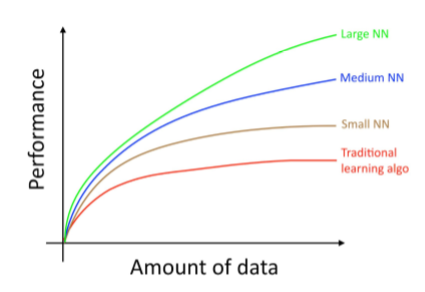

* 은닉 층의 개수에 따라 딥러닝 모델의 성능이 어떻게 달라지는지 확인해 봅시다. 

https://playground.tensorflow.org/

    1. 은닉 층의 개수를 점차 늘려가면서 모델이 데이터를 잘 분류하는지 확인해 봅시다. 
    2. 은닉 층과 한 층 안의 뉴런의 수는 모델의 성능과 어떤 관계가 있는지 확인해 봅시다. 